# COVID-19 Data Exploration 
## by Ahmed Maher

## Preliminary Wrangling

> This dataset includes COVID-19 cases per day and total cases and other information which may help us to find any relation between variable or What's going on across the different continent                        
 [source](https://ourworldindata.org/coronavirus-source-data) has 30116 rows after removing nulls value before nulls it was(31074 rows).<br>
 <p style="color:red;">
**this date from 2019-12-31 to 2020-07-18**
 </p>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("owid-covid-data.csv" )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31074 entries, 0 to 31073
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         31010 non-null  object 
 1   continent                        30809 non-null  object 
 2   location                         31074 non-null  object 
 3   date                             31074 non-null  object 
 4   total_cases                      30750 non-null  float64
 5   new_cases                        30750 non-null  float64
 6   total_deaths                     30750 non-null  float64
 7   new_deaths                       30750 non-null  float64
 8   total_cases_per_million          30686 non-null  float64
 9   new_cases_per_million            30686 non-null  float64
 10  total_deaths_per_million         30686 non-null  float64
 11  new_deaths_per_million           30686 non-null  float64
 12  total_tests       

# depict Missing value counts 

Text(0.5, 1.0, 'Missing Values')

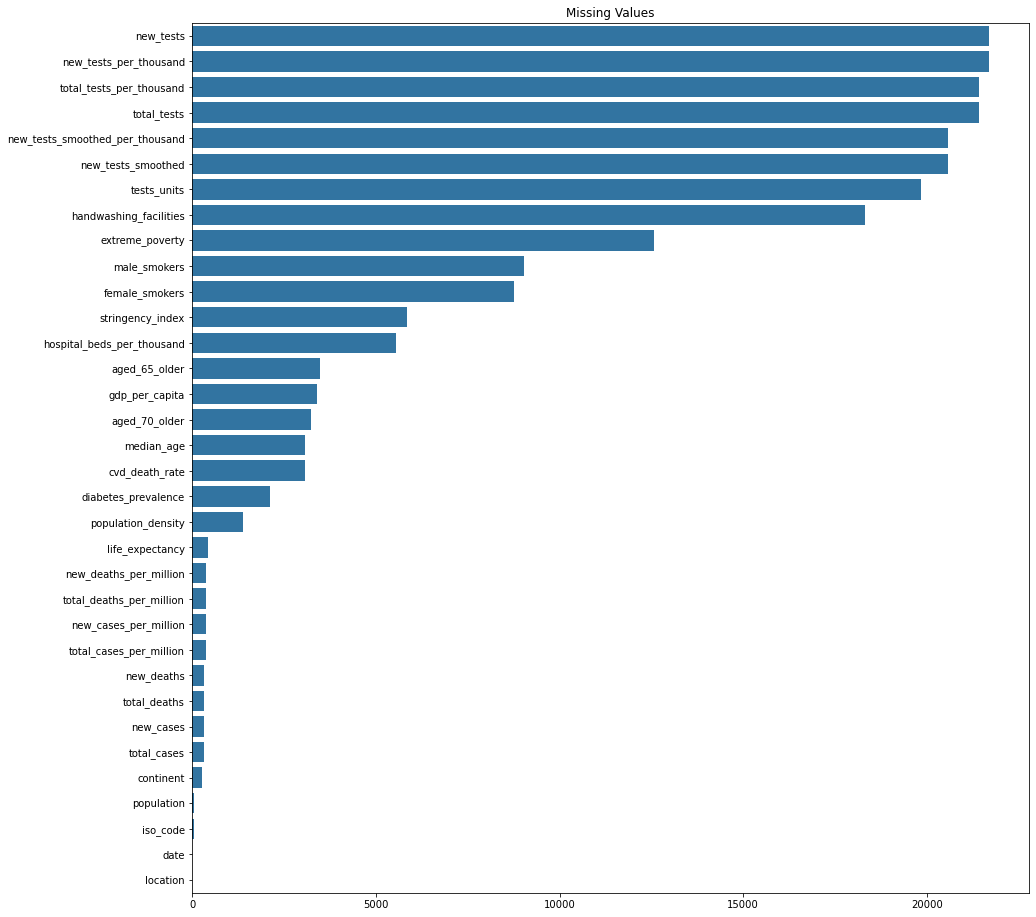

In [4]:
base_color = sb.color_palette()[0]
null_counts = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(15,16))
sb.barplot(y= null_counts.index , x= null_counts , color=base_color )
plt.title("Missing Values")

In [5]:
interested_features = [
    "continent", "location", "date", "total_cases", "new_cases" , "total_deaths" , "new_deaths" , "total_cases_per_million"
    , "total_deaths_per_million" , "new_deaths_per_million" , "population" , "life_expectancy"
]

df = df[interested_features]

df.dropna(inplace=True)
df["date"] = pd.to_datetime(df["date"])
(df["date"].min() , df["date"].max() )

(Timestamp('2019-12-31 00:00:00'), Timestamp('2020-07-18 00:00:00'))

### What is the structure of your dataset?

> There are 31,074 entries in the dataset with 34 features  Most variables are numeric in nature 

### What is/are the main feature(s) of interest in your dataset?

> I interested in <br>
(continent, location, date, total_cases, new_cases  , total_deaths , new_deaths , total_cases_per_million   , total_deaths_per_million  , new_deaths_per_million  , population  , life_expectancy ) <br>
_since  they have a lower number of missing values which increase the reliability of our insights_


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `continent` which leads us to know where is the lower cases happen and I think the Arab World has the lower number of cases comparing with the foreign continent . Most of Arab word located on Africa and Asia <hr><br>
`date`   to know how number of cases per day distributed  <hr><br>
`total_cases`  which country has the most number of cases.  we can talk into our account the population to know if the country with high population help the virus to spread quickly. we can use this also to graph pie chart across different continent  <hr><br>         
`life_expectancy`to see    if there is a relationship between life_expectancy   and the spread of the viruses <hr><br>   
`new_deaths`      we can depict the line chart where the x-axis is the time and y-axis is the new_deaths  in the continent

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
life_expectancy = (df.groupby(["continent"])["life_expectancy"]
                   .mean()
                   .reset_index()
                   .sort_values("life_expectancy" , ascending = False)
                  )
 

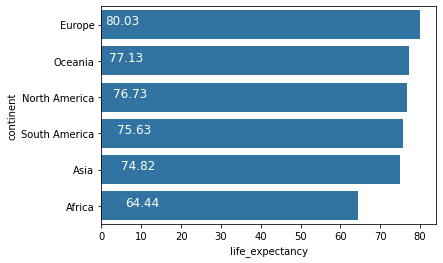

In [7]:
# color = blue 
# it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color
base_color = sb.color_palette()[0]

sb.barplot(data = life_expectancy , y="continent" , x="life_expectancy" , color=base_color);


# put a text ( life_expectancy ) on bar 
locs, labels = plt.yticks()
count = 0

for loc, label in zip(locs, labels):
    plt.text(loc + 1 ,
             count, 
             "{0:.2f}".format(life_expectancy.query("continent == @label.get_text()")["life_expectancy"].values[0]) ,
             color = "w"  ,
             fontsize=12)
    count +=1



> depict bar chart for life_expectancy at each country to investigate if there is a kind of relationship between this variable and death per day or other variables 
- we can see that Africa has the lowest life_expectancy where Europ has the highest life_expectancy

In [8]:
population = (df.groupby(["continent"])["population"]
                   .mean()
                   .reset_index()
                   .sort_values("population" , ascending = False)
                  )
population 

,continent,population
1,Asia,1.143540e+08
5,South America,4.043296e+07
0,Africa,2.807262e+07
3,North America,2.400274e+07
2,Europe,1.732143e+07
4,Oceania,6.614540e+06


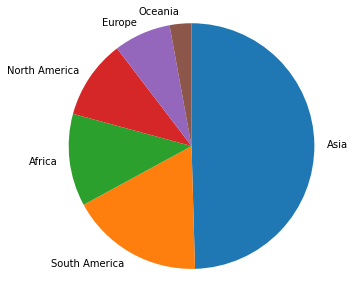

In [9]:
plt.figure(figsize = [10, 5])
plt.pie(x=population["population"] ,labels= population["continent"] , startangle = 90 , counterclock = False );
plt.axis('square');

> depict which country has the most number of population to see if there is any relation between the population of the country and their total cases however we have 6 variable here so it will be better to using bar chart but I depict pie chart for practice <br>
- it seems Asia has 50% of the total population on the earth so I expect to see they have 40% to 50% of total cases

(0.0, 10.0)

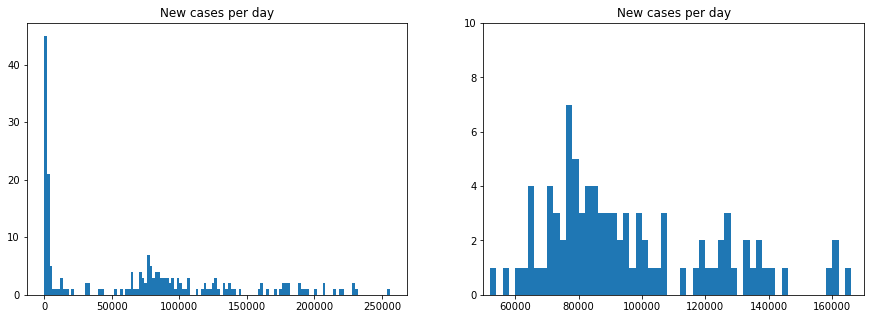

In [10]:
new_cases = df.groupby("date")["new_cases"].sum()
plt.figure(figsize = [15, 5])

plt.subplot(1,2,1)
bins =  np.arange(0 , new_cases.max() +1 , 2000 ) 
plt.hist(new_cases , bins=bins);
plt.title("New cases per day")
plt.subplot(1,2,2)
bins =  np.arange(0 , new_cases.max() +1 , 2000 ) 
plt.hist(new_cases , bins=bins);
plt.title("New cases per day")
plt.xlim([50000,170000])
plt.ylim((0,10))

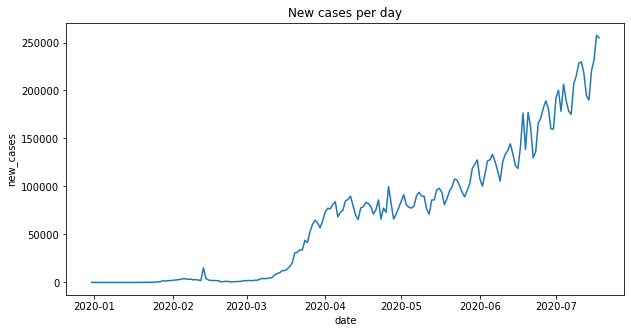

In [11]:
plt.figure(figsize = [10, 5])
sb.lineplot(new_cases.index , new_cases );
plt.title("New cases per day");

> depict new cases per day using histogram and line chart 
- it seems cases per day increase since 2020-3

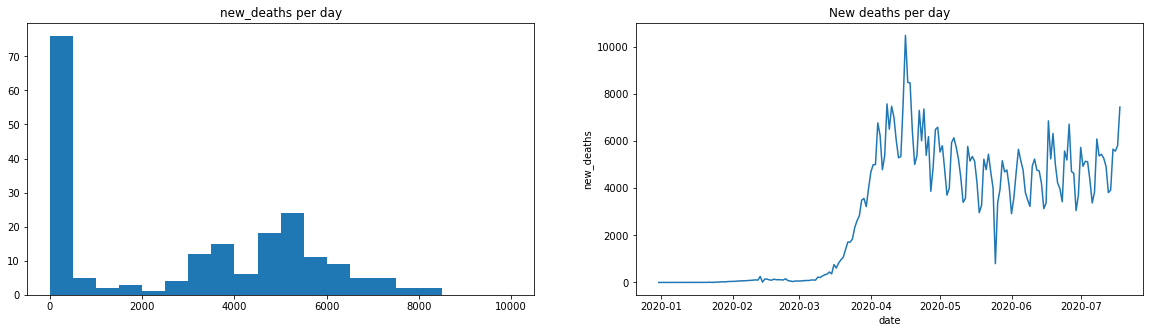

In [12]:

new_deaths = df.groupby("date")["new_deaths"].sum()
bins = np.arange(0 , new_deaths.max()+1 , 500)
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
plt.hist(new_deaths , bins=bins)
plt.title("new_deaths per day")
plt.subplot(1,2,2)

sb.lineplot(new_deaths.index , new_deaths);
plt.title("New deaths per day");


> depict new deaths per day 
- it seems between April and May has the highest number of death 
- between May and June, the number of death decreased significance 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> for the number of cases per day and number of death per day it is better to use log for data since the scale of our data not linera but i couldn't interpret the result since i get the idea well how to convey the scale of log into interpretable result <br><hr>
for number of death per a day in a specific day between May and june the number of cases deacreas significane which is werid as we don't know the reson behaind that may the data is incorrect or there is no  enough data available for these day since we drop 900 record may these reason behaind these decreas 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> since some data are discread and not linear scale (i couldn't to convert into log scale as i don't know how i can interpret result well) but i used line chart instead of histogram to visualize these variable since it is related to time of day 

## Bivariate Exploration

> we will explore to see if there is any relationship between 
- x = "life_expectancy" , y="new_deaths" 
- x = "new_cases" , y="new_deaths"
-  x="continent" , y="new_deaths"
- y="location" , x="Tota_cases"
- y="location" , x="Tota_deaths"

> using varity of technique such as scatter plot which is usefel to depict relationship between two numeric variable 
<br>
or using heatmap also useful to handel with numeric or categorical variable
<br>
or using violna which is useful between one numeric varaible and one quantitive variable

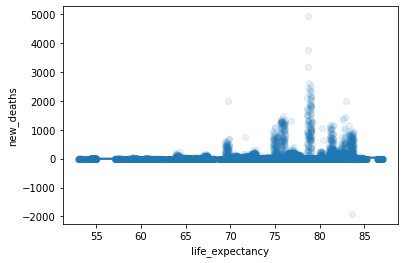

In [13]:
sb.regplot(data = df , x = "life_expectancy" , y="new_deaths" , scatter_kws = {"alpha":1/10} , x_jitter = .3 ,y_jitter = .3,)
# plt.ylim((0,4000))


it seems like it is discrete variable for life_expectancy

array([[1.        , 0.73823514],
       [0.73823514, 1.        ]])

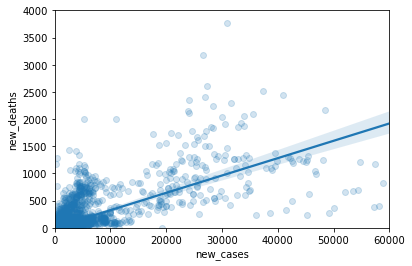

In [14]:
sb.regplot(data = df , x = "new_cases" , y="new_deaths" , x_jitter = .3 ,y_jitter = .3, scatter_kws = {"alpha":1/5})
plt.xlim((0,60000))
plt.ylim((0,4000))

np.corrcoef(x=df["new_cases"] , y=df["new_deaths"])

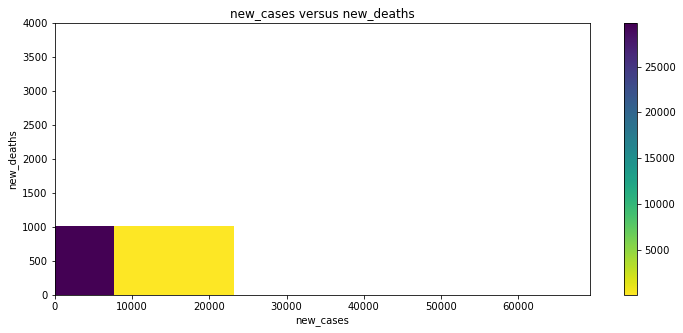

In [15]:
plt.figure(figsize=[12,5])
bins_x = np.arange(0 , 77000 , 77000/10 )
bins_y = np.arange(0 , 5000 , 5000 / 5)

plt.hist2d(data = df , x= "new_cases" , y= "new_deaths" , bins = [bins_x , bins_y] , cmap ="viridis_r" , cmin =50);
plt.colorbar()
plt.xlabel("new_cases")
plt.ylabel("new_deaths")
plt.title("new_cases versus new_deaths");

# df[["new_cases" , "new_deaths"]].describe()

c:\users\ahmed maher salam\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\ahmed maher salam\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\ahmed maher salam\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\ahmed maher salam\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


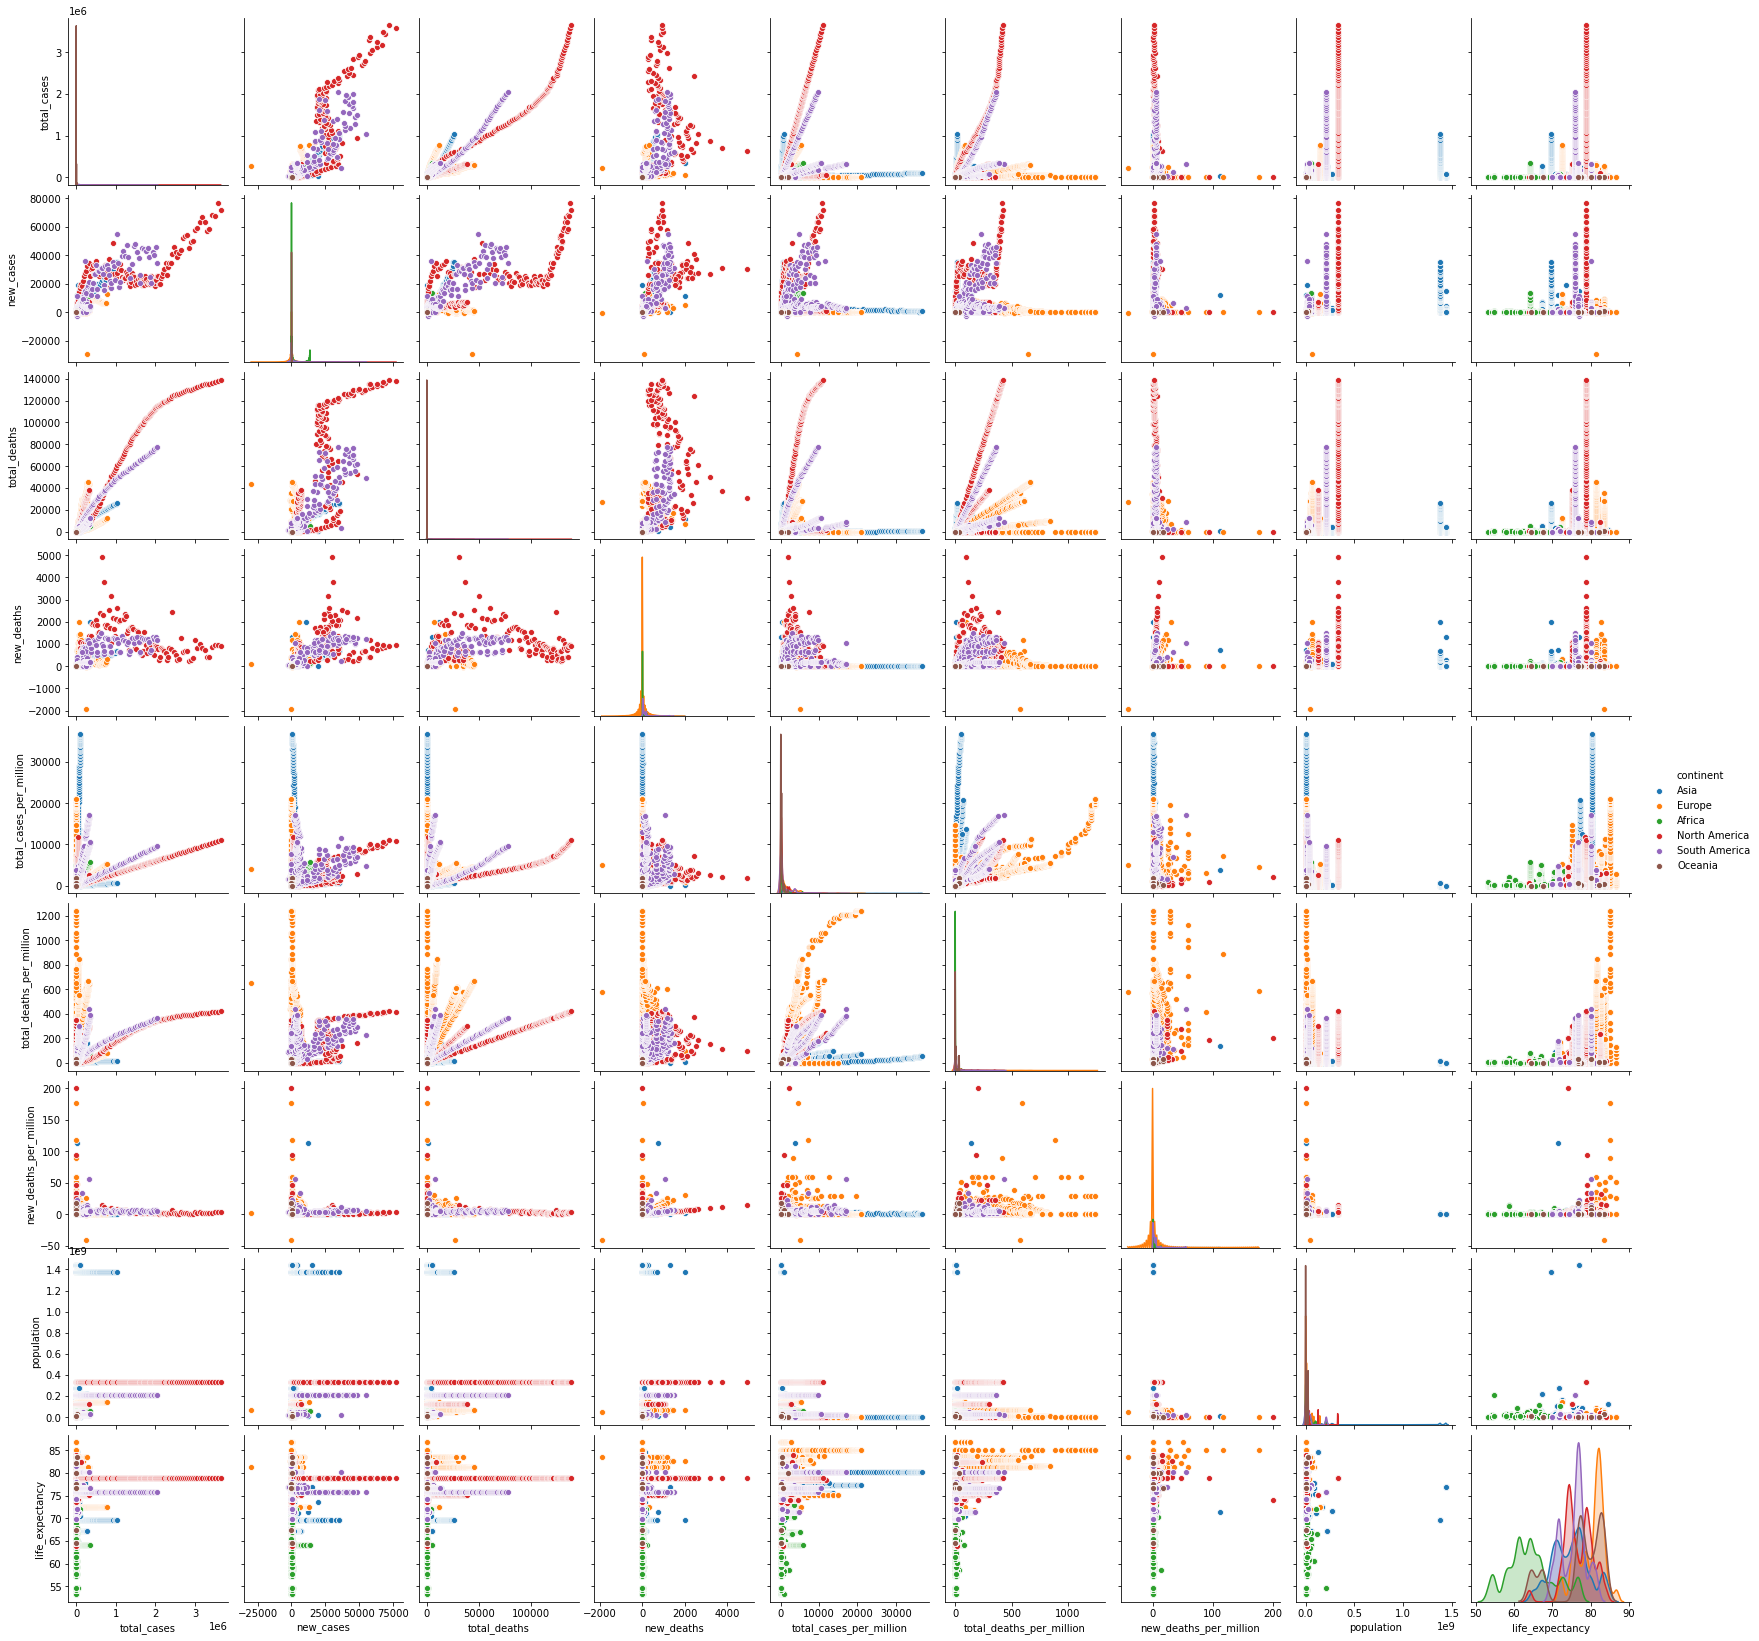

In [16]:
sb.pairplot(df , hue="continent")


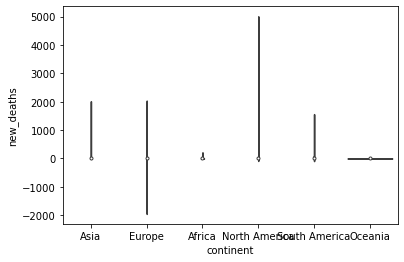

In [26]:
sb.violinplot(data=df , x="continent" , y="new_deaths")

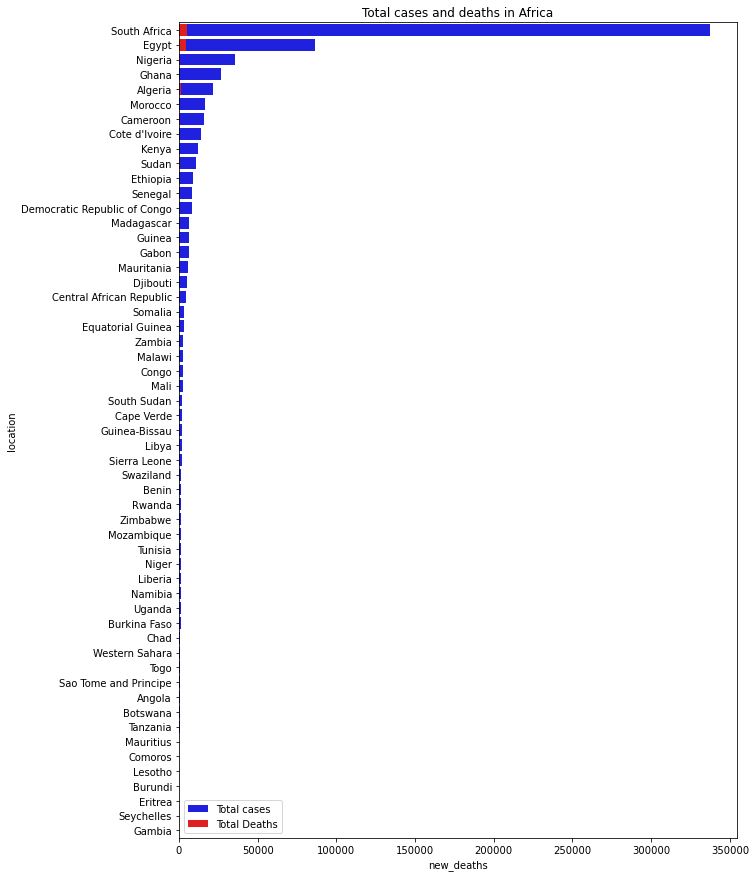

In [52]:
summary = df.groupby(["continent" , "location"]).sum()[["new_cases", "new_deaths"]]
Africa = summary.loc["Africa"].reset_index().sort_values(["new_cases", "new_deaths"] ,ascending= [False,False])
plt.figure(figsize=[10,15])
sb.barplot(data = Africa , y="location" , x="new_cases" , color = "blue" , label="Total cases")
sb.barplot(data = Africa , y="location" , x="new_deaths" , color = "red" , label= "Total Deaths")
plt.title("Total cases and deaths in Africa")
plt.legend()



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> i couldn't find any realtionship amoung the aboe variables

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yep when i create Multivariate exploration i have found the Africa has the lowest one has lowest total cases so i depict i chart for Africa and i have found some country on Africa has no COVID-19 or lowest number which lead us why?

## Multivariate Exploration

> we will invistage the relatinship between 
- "date" , "continent"  , "new_cases", "new_deaths"
-  "continent"  , "Total cases", "Total _deaths"

(0.0, 80000.0)

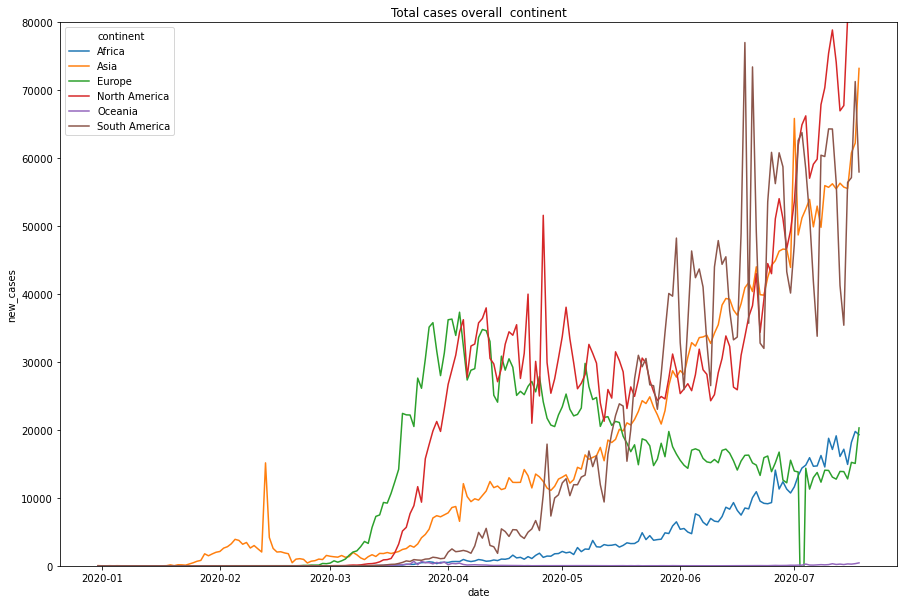

In [74]:
summary = df.groupby(["date" , "continent"] ).sum()[["new_cases", "new_deaths" ]]
summary = summary.reset_index()
# summary
plt.figure(figsize=[15,10])
sb.lineplot(data = summary , y="new_cases" , x="date" , color = "blue" , hue="continent")
plt.title("Total cases overall  continent")
plt.ylim((0,80000))

(0.0, 5000.0)

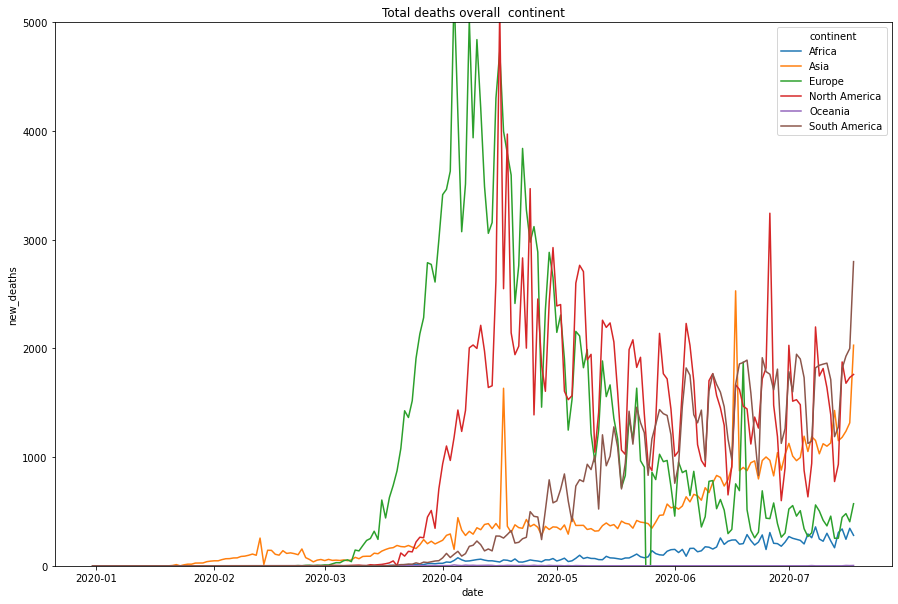

In [77]:
plt.figure(figsize=[15,10])
sb.lineplot(data = summary , y="new_deaths" , x="date" , color = "red"  , hue= "continent")

plt.title("Total deaths overall  continent")
plt.ylim((0,5000))

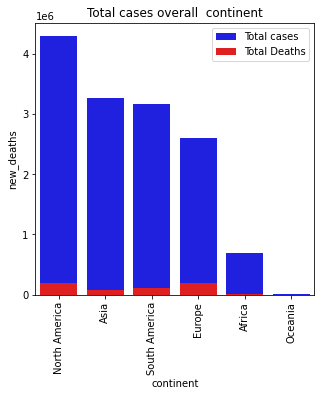

In [107]:
Total = (summary.iloc[:,1:]
         .groupby("continent")
         .sum()
         .reset_index()
         .sort_values(["new_cases" , "new_deaths"] , ascending=[False, False] )
        )
         
plt.figure(figsize=[5,5])

sb.barplot(data = Total , y="new_cases" , x="continent" , color = "blue" , label="Total cases" )

sb.barplot(data = Total , y="new_deaths" , x="continent" , color = "red"  , label="Total Deaths")

plt.title("Total cases overall  continent")
plt.xticks(rotation = 90);
plt.legend()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the trend line for new cases per day looks like the trend line for new deaths per day which lead us to say . The higher new cases per day , the higher death per day

### Were there any interesting or surprising interactions between features?

> However, Africa has the lowest life_expectancy 64.44 and located on number 3 according to the large population it has the lowest total cases and lowest deaths comparing with other continents except Oceania. Also, Africa has the lowest new cases per day and the lowest new death which is weird Africa has warm weather comparing with another country. maybe the weather play a role in the spread of the COVID-19 or maybe something else